In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fcai-summer-training/Session 2/boat_data_manipulated.csv')
df.head()

,amount,boat_type,manufacturer,type,year_built,length,width,material,location,iso,number_of_views_last_7_days
0,3337$,Motor Yacht,Rigiflex power boats,new boat from stock,in 2017,4.00,1.90,NaN,Switzerland,CHE,226
1,3490$,Center console boat,Terhi power boats,new boat from stock,in 2020,4.00,1.50,Thermoplastic,Germany,DEU,75
2,3770$,Sport Boat,Marine power boats,new boat from stock,NaN,3.69,1.42,Aluminium,Switzerland,CHE,124
3,25900$,Sport Boat,Pioner power boats,new boat from stock,in 2020,3.00,1.00,NaN,Denmark,DNK,64
4,3399$,Fishing Boat,Linder power boats,new boat from stock,in 2019,3.55,1.46,Aluminium,Germany,DEU,58


# Cleaning and preprocessing

## Checking data type correctness

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   amount                       10009 non-null  object 
 1   boat_type                    10009 non-null  object 
 2   manufacturer                 8651 non-null   object 
 3   type                         10003 non-null  object 
 4   year_built                   9441 non-null   object 
 5   length                       9999 non-null   float64
 6   width                        9949 non-null   float64
 7   material                     8232 non-null   object 
 8   location                     9869 non-null   object 
 9   iso                          9869 non-null   object 
 10  number_of_views_last_7_days  10009 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 860.3+ KB


**Amount and year_built should be parsed and turned into int64**

How can we do that?

### solution

In [ ]:
df['amount'] = df['amount'].apply(lambda x: float(x[:-1]))

In [ ]:
df['year_built'] = df['year_built'].apply(lambda x: x if type(x) != type('') else int(x.replace('in ', '')))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   amount                       10009 non-null  float64
 1   boat_type                    10009 non-null  object 
 2   manufacturer                 8651 non-null   object 
 3   type                         10003 non-null  object 
 4   year_built                   9441 non-null   float64
 5   length                       9999 non-null   float64
 6   width                        9949 non-null   float64
 7   material                     8232 non-null   object 
 8   location                     9869 non-null   object 
 9   iso                          9869 non-null   object 
 10  number_of_views_last_7_days  10009 non-null  int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 860.3+ KB


## Checking duplicates

In [ ]:
df.duplicated().sum()

120

**There are 120 duplicated rows in this dataset**

should we remove them?

### Solution

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

0

## Checking Missing Data

In [ ]:
df.isna().sum()

amount                            0
boat_type                         0
manufacturer                   1338
type                              6
year_built                      551
length                            9
width                            56
material                       1750
location                        140
iso                             140
number_of_views_last_7_days       0
dtype: int64

There are multiple values that are null and there are two ways to handle them, one is to impute them and the other is to drop them; but how to choose between them?

1. Dropping Data
> - dropping **rows** where there are null values than threshold
> - dropping **columns** where there are null values than threshold

2. Imputing Data
> - numerical data can be imputed using mean, median or even mode
> - categorical data can be imputed using mode
**NOTE THAT**: both numerical and categorical data can be imputed using **KNN imputing** algorithm but this is an advanced topic and left for self-study



### Dropping data
Always make sure that the data you're dropping is as small as possible as to not lose important information

#### Checking null values row wise

In [ ]:
rows = df.isna().sum(axis=1)
print('we have ', rows[rows >= 4].shape[0], ' rows that contian more than 4 null values')
rows[rows >= 4]

we have  5  rows that contian more than 4 null values


7       4
990     4
1389    4
7373    5
9830    4
dtype: int64

In [ ]:
idexes_to_drop = rows[rows >= 3].index
df = df.drop(index=idexes_to_drop)

In [ ]:
df.isna().sum()

amount                            0
boat_type                         0
manufacturer                   1295
type                              4
year_built                      528
length                            3
width                            39
material                       1711
location                        115
iso                             115
number_of_views_last_7_days       0
dtype: int64

#### Checking null values row wise

**Let's assume we have a threshold of 30%> to drop the whole column**

In [ ]:
np.round((df.isna().sum()/df.shape[0])*100)

amount                          0.0
boat_type                       0.0
manufacturer                   13.0
type                            0.0
year_built                      5.0
length                          0.0
width                           0.0
material                       17.0
location                        1.0
iso                             1.0
number_of_views_last_7_days     0.0
dtype: float64

**these columns should not be dropped since they are less than 30% empty**

### Imputing data

#### 1. Handling numric

##### 1.1 replacing with mean

In [ ]:
df[(df['width'].isna()) | (df['length'].isna())].head()

,amount,boat_type,manufacturer,type,year_built,length,width,material,location,iso,number_of_views_last_7_days
646,34000.0,Bowrider,Cobalt power boats,"Used boat,Unleaded",2004.0,7.50,NaN,NaN,Portugal,PRT,286
1054,52000.0,Pilothouse,Marex power boats,"Used boat,Diesel",2001.0,8.84,NaN,GRP,Croatia,HRV,213
1146,57000.0,Sport Boat,Lema power boats,"new boat from stock,Unleaded",2017.0,8.20,NaN,NaN,Italy,ITA,56
1258,63000.0,Motor Yacht,Gulf Craft power boats,"Used boat,Unleaded",2003.0,10.97,NaN,GRP,Montenegro,MNE,130
1290,65000.0,Wakeboard/Wakesurf,MasterCraft power boats,"Used boat,Unleaded",2011.0,7.32,NaN,Plastic,Netherlands,NLD,395


In [ ]:
df = df.fillna({
    'width': df['width'].mean(),
    'length':df['width'].mean()
})

In [ ]:
df[(df['width'].isna()) | (df['length'].isna())].head()

,amount,boat_type,manufacturer,type,year_built,length,width,material,location,iso,number_of_views_last_7_days


##### 1.2 replacing with median

In [ ]:
df[df['year_built'].isna()].head()

,amount,boat_type,manufacturer,type,year_built,length,width,material,location,iso,number_of_views_last_7_days
2,3770.0,Sport Boat,Marine power boats,new boat from stock,NaN,3.69,1.42,Aluminium,Switzerland,CHE,124
5,3650.0,Sport Boat,Linder power boats,new boat from stock,NaN,4.03,1.56,Aluminium,Switzerland,CHE,132
11,3480.0,Fishing Boat,Marine power boats,new boat from stock,NaN,4.13,1.41,Aluminium,Switzerland,CHE,145
15,4400.0,Deck Boat,Buster power boats,"new boat from stock,Unleaded",NaN,3.88,1.49,Aluminium,Switzerland,CHE,263
16,4380.0,Sport Boat,Linder power boats,new boat from stock,NaN,4.31,1.64,Aluminium,Switzerland,CHE,462


In [ ]:
df = df.fillna({
    'year_built': df['year_built'].median(),
})

In [ ]:
df[df['year_built'].isna()].head()

,amount,boat_type,manufacturer,type,year_built,length,width,material,location,iso,number_of_views_last_7_days


#### 2. Handling categorical

##### 1.1 replacing with mode

In [ ]:
mask =  df['type'].isna() | df['manufacturer'].isna() | df['material'].isna() | df['location'].isna() | df['iso'].isna()
df[mask].head()

,amount,boat_type,manufacturer,type,year_built,length,width,material,location,iso,number_of_views_last_7_days
0,3337.0,Motor Yacht,Rigiflex power boats,new boat from stock,2017.0,4.00,1.90,NaN,Switzerland,CHE,226
3,25900.0,Sport Boat,Pioner power boats,new boat from stock,2020.0,3.00,1.00,NaN,Denmark,DNK,64
6,3600.0,Catamaran,NaN,"Used boat,Unleaded",1999.0,6.20,2.38,Aluminium,Switzerland,CHE,474
8,3333.0,Fishing Boat,Crescent power boats,new boat from stock,2019.0,3.64,1.37,NaN,Germany,DEU,45
9,3300.0,Pontoon Boat,Whaly power boats,new boat from stock,2018.0,4.35,1.73,NaN,Italy,ITA,180


In [ ]:
df = df.fillna({
    'type': df['type'].mode()[0],
    'manufacturer': df['manufacturer'].mode()[0],
    'material': df['material'].mode()[0],
    'location': df['location'].mode()[0],
    'iso': df['iso'].mode()[0],
})

In [ ]:
df[df['type'].isna()].head()

,amount,boat_type,manufacturer,type,year_built,length,width,material,location,iso,number_of_views_last_7_days


##### 1.2 using KNNImputer (Self-Study)

### output after cleaning

In [ ]:
df.isna().sum()

amount                         0
boat_type                      0
manufacturer                   0
type                           0
year_built                     0
length                         0
width                          0
material                       0
location                       0
iso                            0
number_of_views_last_7_days    0
dtype: int64

## Checking outliers

**Checking outliers can be either upfront or tricky since you need to define what could be considered an outlier for your data**

### describing data

first you need to have a statistical view/analysis of your data:
this can be done with Dataframe `.describe()` method

In [ ]:
df.describe()

,amount,year_built,length,width,number_of_views_last_7_days
count,9.831000e+03,9831.000000,9831.000000,9831.000000,9831.000000
mean,3.173131e+05,2005.084122,11.554775,3.516608,148.841827
std,9.971403e+05,15.925026,5.973922,1.211223,151.325235
min,3.300000e+03,1885.000000,1.040000,0.010000,13.000000
25%,4.400000e+04,2000.000000,7.465000,2.540000,70.000000
50%,9.500000e+04,2008.000000,10.280000,3.340000,107.000000
75%,2.550000e+05,2017.000000,13.925000,4.250000,171.000000
max,3.100000e+07,2021.000000,100.000000,25.160000,3263.000000


in `amount` column we can see that the minimum value for an amount is $3,300$ and max is $31,000,000$ with a mean of $317,313.1$ and std of $997,140.3$

**What can we conclude from that?**

there is a serious case of outliers in this column

### plotting data

We can also plot the distribution of the data in a **histogram** or a **box plot**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Boxplots

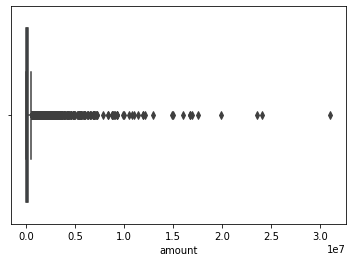

In [ ]:
sns.boxplot(data=df, x='amount')
plt.show()

#### Histograms

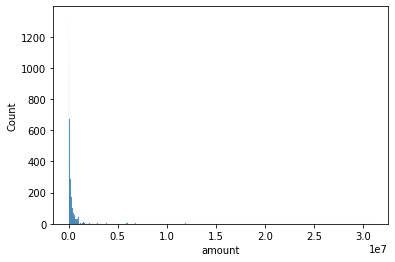

In [ ]:
sns.histplot(data=df, x='amount')
plt.show()

#### life hack to make all our lives easier

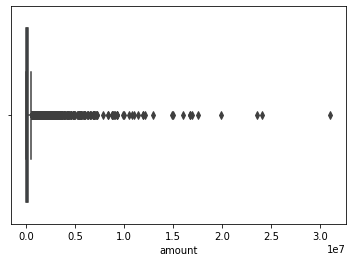

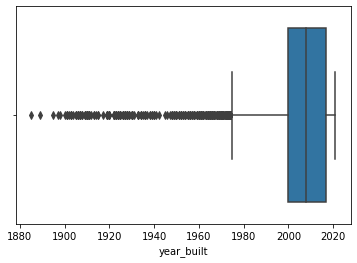

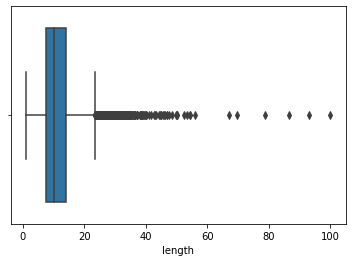

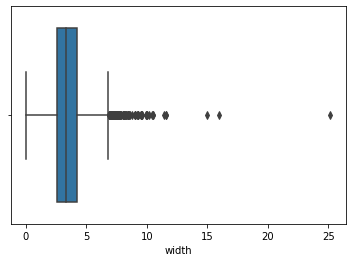

In [ ]:
cols = ['amount', 'year_built', 'length', 'width']
for col in cols:
    sns.boxplot(data=df, x=col)
    plt.show()

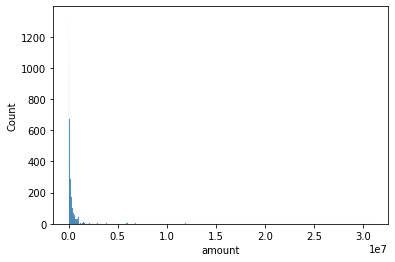

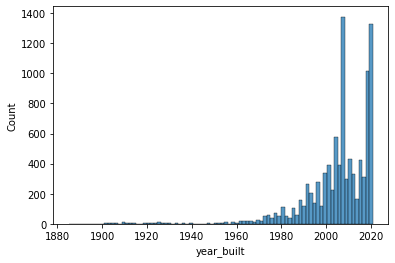

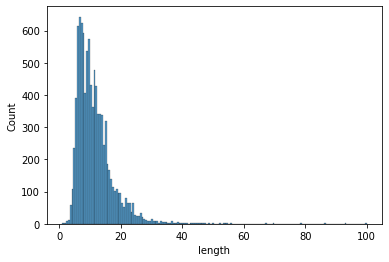

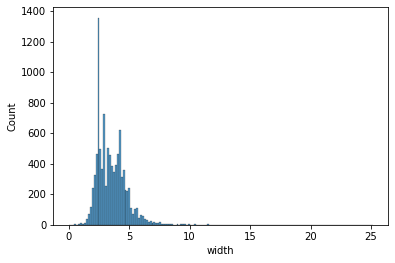

In [ ]:
cols = ['amount', 'year_built', 'length', 'width']
for col in cols:
    sns.histplot(data=df, x=col)
    plt.show()

### Conclusion after plotting

now what we did is that we supported our assumption that amount may have outliers

**how can we handle them then?**

#### Using quartiles

In [ ]:

q75, q25 = np.percentile(df.loc[:, 'amount'], [75, 25])
intr_qr = q75 - q25

max = q75 + (1.5 * intr_qr)
min = q25 - (1.5 * intr_qr)

print('lower bound is = %0.2f and higher bound is = %0.2f for amount' %(min, max))

quartiles_df = df.copy()
quartiles_df.loc[quartiles_df['amount'] < min, 'amount'] = np.nan
quartiles_df.loc[quartiles_df['amount'] > max, 'amount'] = np.nan

quartiles_df.isna().sum()

lower bound is = -272500.00 and higher bound is = 571500.00 for amount


amount                         1062
boat_type                         0
manufacturer                      0
type                              0
year_built                        0
length                            0
width                             0
material                          0
location                          0
iso                               0
number_of_views_last_7_days       0
dtype: int64

In [ ]:
quartiles_df = quartiles_df.dropna()

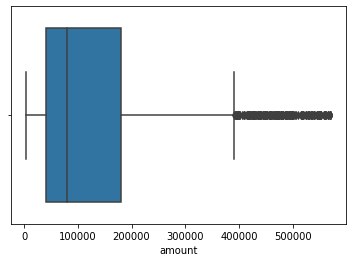

In [ ]:
sns.boxplot(data=quartiles_df, x='amount')

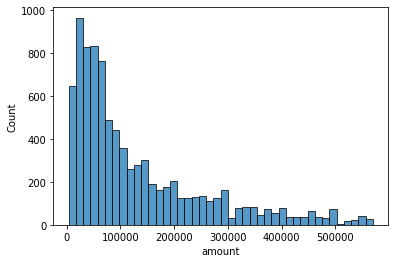

In [ ]:
sns.histplot(data=quartiles_df, x='amount')

In [ ]:
quartiles_df.describe()

,amount,year_built,length,width,number_of_views_last_7_days
count,8769.000000,8769.000000,8769.000000,8769.000000,8769.000000
mean,129549.227962,2004.403353,10.364075,3.285485,152.721177
std,124931.213833,16.372504,4.417602,0.957626,154.589329
min,3300.000000,1885.000000,1.150000,0.500000,15.000000
25%,39800.000000,1999.000000,7.200000,2.520000,71.000000
50%,79500.000000,2008.000000,9.690000,3.100000,110.000000
75%,180000.000000,2017.000000,12.670000,3.990000,177.000000
max,570000.000000,2021.000000,100.000000,16.000000,3263.000000


#### using Z-score (normal-distribution)

In [ ]:
from scipy import stats

z = np.abs(stats.zscore(df['amount']))


z_df = df.copy()

threshold = 3 #standard cutoff value
z_df.loc[z > threshold, 'amount'] = None

z_df.isna().sum()

amount                         124
boat_type                        0
manufacturer                     0
type                             0
year_built                       0
length                           0
width                            0
material                         0
location                         0
iso                              0
number_of_views_last_7_days      0
dtype: int64

In [ ]:
z_df = z_df.dropna()

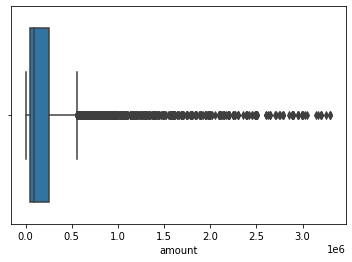

In [ ]:
sns.boxplot(data=z_df, x='amount')

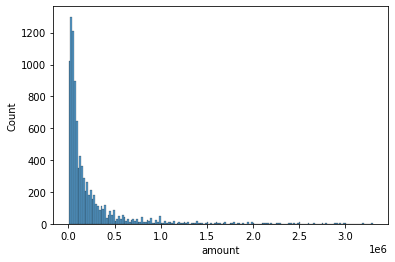

In [ ]:
sns.histplot(data=z_df, x='amount')

In [ ]:
z_df.describe()

,amount,year_built,length,width,number_of_views_last_7_days
count,9.707000e+03,9707.000000,9707.000000,9707.000000,9707.000000
mean,2.315902e+05,2004.984032,11.310401,3.472635,148.608118
std,3.862689e+05,15.959531,5.504746,1.144347,151.303326
min,3.300000e+03,1885.000000,1.040000,0.010000,13.000000
25%,4.311000e+04,2000.000000,7.430000,2.540000,70.000000
50%,9.419000e+04,2008.000000,10.160000,3.310000,107.000000
75%,2.479100e+05,2017.000000,13.800000,4.200000,171.000000
max,3.300000e+06,2021.000000,100.000000,25.160000,3263.000000


#### outlier reomval depends on the buissness problem and buissness knowledge

# Refrences
[5 Ways to Find Outliers in Your Data](https://statisticsbyjim.com/basics/outliers/)

[Ways to Detect and Remove the Outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)

[Handling outliers in python](https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/)

